In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame({
    "Equipo": ["Barcelona", "Madrid", "Sevilla", "Madrid", "Barcelona", "Sevilla", "Madrid", "Barcelona"],
    "Oponente": ["Sevilla", "Barcelona", "Madrid", "Sevilla", "Madrid", "Barcelona", "Barcelona", "Sevilla"],
    "goles anotados": np.random.randint(0,5, size=8),
    "goles recibidos": np.random.randint(0,5, size=8)
})
print(df)

      Equipo   Oponente  goles anotados  goles recibidos
0  Barcelona    Sevilla               0                3
1     Madrid  Barcelona               3                3
2    Sevilla     Madrid               4                3
3     Madrid    Sevilla               4                4
4  Barcelona     Madrid               2                2
5    Sevilla  Barcelona               0                0
6     Madrid  Barcelona               3                1
7  Barcelona    Sevilla               3                1


In [6]:
#Creacion de una tabla dinamica
pivotTable = df.pivot_table(values=['goles anotados', 'goles recibidos'], index='Equipo', aggfunc=np.sum)
print(pivotTable)

           goles anotados  goles recibidos
Equipo                                    
Barcelona               5                6
Madrid                 10                8
Sevilla                 4                3


C:\Users\Nelson.Daza\AppData\Local\Temp\ipykernel_21444\3446222334.py:2: FutureWarning: The provided callable <function sum at 0x000001233015C5E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotTable = df.pivot_table(values=['goles anotados', 'goles recibidos'], index='Equipo', aggfunc=np.sum)


In [7]:
pivotTable['Diferencia goles'] = pivotTable['goles anotados'] - pivotTable['goles recibidos']
print(pivotTable)

           goles anotados  goles recibidos  Diferencia goles
Equipo                                                      
Barcelona               5                6                -1
Madrid                 10                8                 2
Sevilla                 4                3                 1


In [9]:
#usamos funcion de agregacion mean
pivotTable = df.pivot_table(values='goles anotados', index="Equipo", aggfunc=np.mean)
print(pivotTable)

           goles anotados
Equipo                   
Barcelona        1.666667
Madrid           3.333333
Sevilla          2.000000


C:\Users\Nelson.Daza\AppData\Local\Temp\ipykernel_21444\2587796080.py:2: FutureWarning: The provided callable <function mean at 0x000001233015D6C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivotTable = df.pivot_table(values='goles anotados', index="Equipo", aggfunc=np.mean)


In [10]:
pivotTable = df.pivot_table(values="goles anotados", index=['Equipo', 'Oponente'], aggfunc=sum)
print(pivotTable)

C:\Users\Nelson.Daza\AppData\Local\Temp\ipykernel_21444\4238040952.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotTable = df.pivot_table(values="goles anotados", index=['Equipo', 'Oponente'], aggfunc=sum)


                     goles anotados
Equipo    Oponente                 
Barcelona Madrid                  2
          Sevilla                 3
Madrid    Barcelona               6
          Sevilla                 4
Sevilla   Barcelona               0
          Madrid                  4


C:\Users\Nelson.Daza\AppData\Local\Temp\ipykernel_21444\4290087020.py:3: FutureWarning: The provided callable <function sum at 0x000001233015C5E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotTable = df.pivot_table(values=['goles anotados', 'goles recibidos'], index='Equipo', aggfunc=np.sum)


           goles anotados  goles recibidos
Equipo                                    
Barcelona               5                6
Madrid                 10                8
Sevilla                 4                3
           goles anotados  goles recibidos  Diferencia goles
Equipo                                                      
Barcelona               5                6                -1
Madrid                 10                8                 2
Sevilla                 4                3                 1


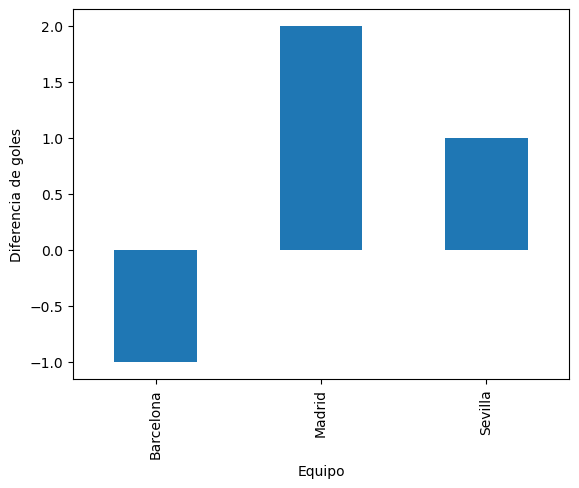

In [11]:
import matplotlib.pyplot as plt

pivotTable = df.pivot_table(values=['goles anotados', 'goles recibidos'], index='Equipo', aggfunc=np.sum)
print(pivotTable)

pivotTable['Diferencia goles'] = pivotTable['goles anotados'] - pivotTable['goles recibidos']
print(pivotTable)

#crear un grafico de barras a partir de la tabla dinamica
pivotTable['Diferencia goles'].plot(kind='bar')
plt.ylabel('Diferencia de goles')
plt.show()

In [13]:
#dataframe con datos de partidos
df = pd.DataFrame({
    "Equipo": ['Barcelona', 'Madrid', 'Sevilla'] * 3,
    'Partido': ['Partido' + str(i) for i in range(1,10)],
    "goles anotados": np.random.randint(0,5, size=9),
    "goles recibidos": np.random.randint(0,5, size=9)    
})

print(df)

      Equipo   Partido  goles anotados  goles recibidos
0  Barcelona  Partido1               2                1
1     Madrid  Partido2               3                2
2    Sevilla  Partido3               0                3
3  Barcelona  Partido4               0                3
4     Madrid  Partido5               3                3
5    Sevilla  Partido6               1                1
6  Barcelona  Partido7               1                1
7     Madrid  Partido8               0                1
8    Sevilla  Partido9               4                1


In [14]:
#Uso del metodo melt
dfMelt = df.melt(id_vars=['Equipo', 'Partido'], value_vars=['goles anotados', 'goles recibidos'])
print(dfMelt)

       Equipo   Partido         variable  value
0   Barcelona  Partido1   goles anotados      2
1      Madrid  Partido2   goles anotados      3
2     Sevilla  Partido3   goles anotados      0
3   Barcelona  Partido4   goles anotados      0
4      Madrid  Partido5   goles anotados      3
5     Sevilla  Partido6   goles anotados      1
6   Barcelona  Partido7   goles anotados      1
7      Madrid  Partido8   goles anotados      0
8     Sevilla  Partido9   goles anotados      4
9   Barcelona  Partido1  goles recibidos      1
10     Madrid  Partido2  goles recibidos      2
11    Sevilla  Partido3  goles recibidos      3
12  Barcelona  Partido4  goles recibidos      3
13     Madrid  Partido5  goles recibidos      3
14    Sevilla  Partido6  goles recibidos      1
15  Barcelona  Partido7  goles recibidos      1
16     Madrid  Partido8  goles recibidos      1
17    Sevilla  Partido9  goles recibidos      1


In [16]:
#Dataframe con goles por jugador
df = pd.DataFrame({
    "Partido": ['Partido 1', 'Partido 2', 'Partido 3'],
    "Messi": [2,1,0],
    "Ronaldo": [1,0,2],
    "Neymar": [0,2,1]
})
print(df)

     Partido  Messi  Ronaldo  Neymar
0  Partido 1      2        1       0
1  Partido 2      1        0       2
2  Partido 3      0        2       1


In [19]:
dfMelted = df.melt(id_vars='Partido', value_vars=["Messi","Ronaldo","Neymar"], var_name='Jugador', value_name='Goles anotados')
print(dfMelted)

     Partido  Jugador  Goles anotados
0  Partido 1    Messi               2
1  Partido 2    Messi               1
2  Partido 3    Messi               0
3  Partido 1  Ronaldo               1
4  Partido 2  Ronaldo               0
5  Partido 3  Ronaldo               2
6  Partido 1   Neymar               0
7  Partido 2   Neymar               2
8  Partido 3   Neymar               1


In [21]:
golesPorJuigador = dfMelted.groupby('Jugador')['Goles anotados'].sum()
print(golesPorJuigador)

Jugador
Messi      3
Neymar     3
Ronaldo    3
Name: Goles anotados, dtype: int64
